In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [74]:
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


In [72]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gender                    768 non-null    int32  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   CalorieIntake             768 non-null    float64
 10  Exercise                  768 non-null    int32  
 11  SleepDuration             768 non-null    int64  
 12  Outcome                   768 non-null    int64  
dtypes: float64(3), int32(2), int64(8)
memory usage: 72.1 KB


In [3]:
l1=[col  for col in diabetes_df.columns if col!="Outcome"]
l1.append("Outcome")
diabetes_df=diabetes_df[l1]
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,M,148,72,35,0,33.6,0.627,50,2508.3,No,6,1
1,1,F,85,66,29,0,26.6,0.351,31,2760.0,Evening,8,0
2,0,M,183,64,0,0,23.3,0.672,32,6480.0,Morning,8,1
3,1,F,89,66,23,94,28.1,0.167,21,NaN,Evening,8,0
4,0,M,137,40,35,168,43.1,2.288,33,1970.0,No,9,1


## Data Clean


In [4]:
def data_clean(df=None):
        df["Exercise"]=df["Exercise"].replace({"No":1,"Evening":2,"Morning":3,"Both":4}).astype(int)
        df["Gender"]=df["Gender"].replace({"M":1,"F":0}).astype(int)
        df["CalorieIntake"].fillna(df["CalorieIntake"].median(),inplace=True)
        return df
    
    
diabetes_df_clean=data_clean(diabetes_df)

In [5]:
diabetes_df_clean.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,1,148,72,35,0,33.6,0.627,50,2508.3,1,6,1
1,1,0,85,66,29,0,26.6,0.351,31,2760.0,2,8,0
2,0,1,183,64,0,0,23.3,0.672,32,6480.0,3,8,1
3,1,0,89,66,23,94,28.1,0.167,21,2893.0,2,8,0
4,0,1,137,40,35,168,43.1,2.288,33,1970.0,1,9,1


In [6]:
continue_feature=['Glucose',                 # part1 
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'CalorieIntake',
 'Outcome']  

Lda_df=diabetes_df_clean

In [7]:
X=Lda_df.iloc[:,:-1]
y=Lda_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

## Visuliazation Of Data by LDA


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1=LinearDiscriminantAnalysis("eigen")

X_r1=clf1.fit(X,y).transform(X)
l2=np.arange(0,len(X_r1))

lda_df=pd.DataFrame(data=np.column_stack([X_r1,diabetes_df_clean["Outcome"],l2]),columns=["X_r1","Outcome","l2"])

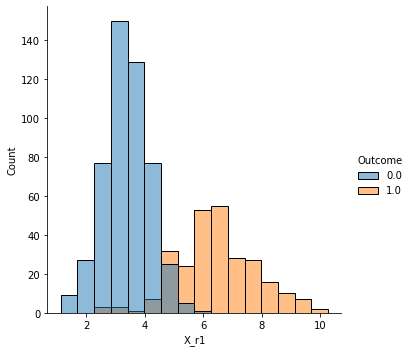

In [9]:
sns.displot(x=lda_df["X_r1"],hue=lda_df["Outcome"])

<AxesSubplot:xlabel='l2', ylabel='X_r1'>

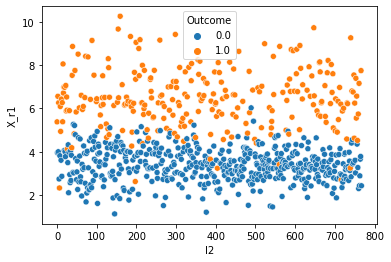

In [10]:
sns.scatterplot(x=lda_df["l2"],y=lda_df["X_r1"],hue=lda_df["Outcome"])

## PCA

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
X_embedded=pca.fit_transform(X)

pca_df=pd.DataFrame(data=X_embedded,columns=["x1","x2"])
pca_df["Outcome"]=y

<AxesSubplot:xlabel='x1', ylabel='x2'>

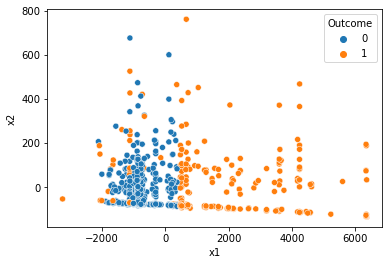

In [12]:
sns.scatterplot(data=pca_df,x='x1',y="x2",hue="Outcome")

In [13]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    X=X
    y=y
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        
        
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label="0", s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label="1", s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

y_pca = pca_df["Outcome"]
X_pca = pca_df.iloc[:, :-1]
X_pca=sc.fit_transform(X_pca)
b = RandomUnderSampler(sampling_strategy=1)
X_pca_balance, y_pca_balance = b.fit_resample(X_pca, y_pca)

X_pca_balance_train, X_pca_balance_test, y_pca_balance_train, y_pca_balance_test = train_test_split(
    X_pca_balance, y_pca_balance)

In [15]:
X_pca_balance_test

array([[-0.66957428, -0.56560481],
       [-0.5140372 ,  1.75467351],
       [-0.45989884, -0.63297068],
       [ 2.72343657,  0.10796806],
       [-1.03228843,  0.67967714],
       [ 1.25850647, -0.83460364],
       [ 0.07230357, -0.69383933],
       [ 0.30610404, -0.73184393],
       [-0.66588929, -0.62382938],
       [-0.45938712, -0.01087132],
       [ 0.0561617 , -0.71084217],
       [ 0.38950849, -0.75674068],
       [ 0.61821355,  3.92886992],
       [-0.66923414, -0.61255247],
       [ 2.52150351,  1.09945616],
       [ 1.1871741 , -0.79126024],
       [ 3.77051293, -1.10448654],
       [ 0.28369328,  1.65180568],
       [-0.66914488, -0.59343529],
       [ 0.88397624,  0.19329614],
       [-0.66505453, -0.61971722],
       [-0.45976866, -0.62899845],
       [ 0.30617499, -0.7352051 ],
       [ 0.07216548, -0.71242284],
       [ 2.53816256, -0.97974994],
       [ 1.25858841, -0.82697958],
       [-0.43193764, -0.6583039 ],
       [-0.98558369, -0.59383018],
       [-0.51510296,

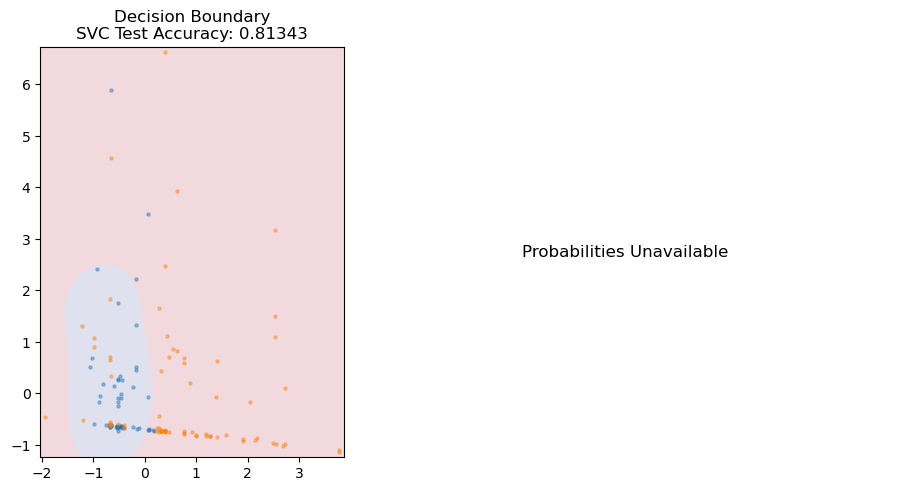

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
model = SVC()
model.fit(X_pca_balance_train, y_pca_balance_train)
model.score(X_pca_balance_test,y_pca_balance_test)
plot_mushroom_boundary(X_pca_balance_test, y_pca_balance_test, model)

### classfication using LDA

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9114583333333334

## T-SNE

In [18]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,perplexity=30.0,n_iter=5000).fit_transform(X)
X_embedded.shape

(768, 2)

In [19]:
t_sne_df=pd.DataFrame(data=X_embedded,columns=["x1","x2"])
t_sne_df["Outcome"]=y

In [20]:
t_sne_df

,x1,x2,Outcome
0,-43.402710,2.283636,1
1,-24.810591,-24.775433,0
2,10.453092,35.058468,1
3,-0.780284,-26.536684,0
4,-27.998516,20.307617,1
...,...,...,...
763,-2.777025,-22.033842,0
764,33.129646,-30.559465,0
765,36.685043,-29.596762,0
766,1.665076,44.106251,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

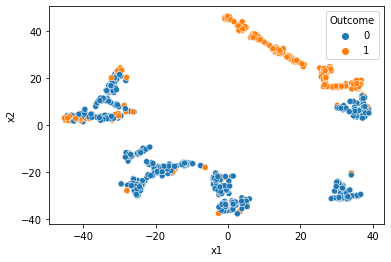

In [21]:
sns.scatterplot(data=t_sne_df,x='x1',y="x2",hue='Outcome')

## General Class for ml model validation

In [57]:
class Ml_Model(object):

    def __init__(self, *arg, scaling=False, balance=False, Oversampling=False):
        import numpy as np
        self.X = arg[0]
        self.y = arg[1]
        if balance:

            if not Oversampling:
                from imblearn.under_sampling import RandomUnderSampler
                b = RandomUnderSampler(sampling_strategy=1)
                self.X, self.y = b.fit_resample(self.X, self.y)

            else:
                from imblearn.over_sampling import RandomOverSampler
                b = RandomOverSampler(sampling_strategy=1)
                self.X, self.y = b.fit_resample(self.X, self.y)

        if not scaling:
            from sklearn.model_selection import train_test_split
            from sklearn.preprocessing import StandardScaler
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y)

        else:
            from sklearn.model_selection import train_test_split
            from sklearn.preprocessing import StandardScaler
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y)

            sc = StandardScaler()
            self.X_train = sc.fit_transform(self.X_train)
            self.X_test = sc.transform(self.X_test)

    def pass_classifier(self, clf=None):
        self.clf = clf
        print(clf)

        return self.clf

    def fit_method_and_score(self):

        clf.fit(self.X_train, self.y_train)

        return clf.predict(X_test)

    def classification_report(self):
        self.y_pred = self.clf.predict(self.X_test)
        from sklearn.metrics import classification_report
        return print(classification_report(self.y_test, self.y_pred))

    def plot_mushroom_boundary(self, X, y, fitted_model):

        plt.figure(figsize=(9.8, 5), dpi=100)
        X = X
        y = y
        for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
            plt.subplot(1, 2, i+1)

            mesh_step_size = 0.01  # step size in the mesh
            x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
            y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(
                y_min, y_max, mesh_step_size))
            if i == 0:
                Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
            else:
                try:
                    Z = fitted_model.predict_proba(
                        np.c_[xx.ravel(), yy.ravel()])[:, 1]
                except:
                    plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                             verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
                    plt.axis('off')
                    break
            Z = Z.reshape(xx.shape)
            plt.scatter(X[y.values == 0, 0], X[y.values == 0, 1],
                        alpha=0.4, label="0", s=5)
            plt.scatter(X[y.values == 1, 0], X[y.values == 1, 1],
                        alpha=0.4, label="1", s=5)
            plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15,
                       extent=(x_min, x_max, y_min, y_max), origin='lower')
            plt.title(plot_type + '\n' +
                      str(fitted_model).split('(')[0] + ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
            plt.gca().set_aspect('equal')

        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

    def validation(self):

        from sklearn.model_selection import StratifiedKFold
        from sklearn.metrics import f1_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from colorama import Fore, Back, Style

        lst_accu_stratified = []
        lst_recall_stratified = []
        lst_precision_stratified = []

        lst_f1_score_stratified = []
        x = 0
        skf = StratifiedKFold(n_splits=18, shuffle=True, random_state=1)
        for train_index, test_index in skf.split(self.X, self.y):
            x_train_fold, x_test_fold = self.X.loc[train_index,
                                                   :], self.X.loc[test_index, :]
            y_train_fold, y_test_fold = self.y[train_index], self.y[test_index]
            self.clf.fit(x_train_fold, y_train_fold)
            y_pre = clf.predict(self.X_test)
#                 print(classification_report(self.y_test,y_pre))

            lst_accu_stratified.append(
                round(accuracy_score(self.y_test, y_pre), 4))
            lst_recall_stratified.append(
                round(recall_score(self.y_test, y_pre), 4))
            lst_f1_score_stratified.append(
                round(f1_score(self.y_test, y_pre), 4))
            lst_precision_stratified.append(
                round(precision_score(self.y_test, y_pre), 4))

        for i, j in zip(["Accuracy", "Recall", "Precision", "F1-Score"], [lst_accu_stratified, lst_recall_stratified, lst_precision_stratified, lst_f1_score_stratified]):

            print(Fore.BLUE+f"\n\n{i} ")
            print(Style.RESET_ALL)

            print(f'List of possible {i} Score:\n', j)

            print(f'\nMaximum {i} Score That can be obtained from this model is:', max(
                j)*100, '%')
            print(f'\nMinimum {i} Score:', min(j)*100, '%')
            print(
                f'\nAverage {i} Score That can be obtained from this model is::', np.mean(j))
            print(
                f'\nMedian {i} Score That can be obtained from this model is::', np.median(j))
            print('\nStandard Deviation is:', np.std(j))

        return None

    def visualization(self):
        from colorama import Fore, Back, Style
        print()
        print(Fore.BLUE+"\n Below Test Acurracy Based On PCA")
        from sklearn.model_selection import train_test_split
        from imblearn.under_sampling import RandomUnderSampler
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2,)
        X_embedded = pca.fit_transform(self.X)
        sc = StandardScaler()

        y_pca = self.y
        X_pca = X_embedded
        X_pca = sc.fit_transform(X_pca)
        b = RandomUnderSampler(sampling_strategy=1)
        X_pca_balance, y_pca_balance = b.fit_resample(X_pca, y_pca)

        X_pca_balance_train, X_pca_balance_test, y_pca_balance_train, y_pca_balance_test = train_test_split(
            X_pca_balance, y_pca_balance)

        model = self.clf
        model.fit(X_pca_balance_train, y_pca_balance_train)
        model.score(X_pca_balance_test, y_pca_balance_test)
        plot_mushroom_boundary(X_pca_balance_test, y_pca_balance_test, model)

## LDA 

LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        63
           1       0.92      0.85      0.88        71

    accuracy                           0.88       134
   macro avg       0.88      0.88      0.88       134
weighted avg       0.88      0.88      0.88       134



Accuracy 

List of possible Accuracy Score:
 [0.8955, 0.9104, 0.9104, 0.9179, 0.9104, 0.903, 0.903, 0.9104, 0.9104, 0.9104, 0.903, 0.903, 0.903, 0.9104, 0.9104, 0.903, 0.903, 0.903]

Maximum Accuracy Score That can be obtained from this model is: 91.79 %

Minimum Accuracy Score: 89.55 %

Average Accuracy Score That can be obtained from this model is:: 0.9067

Median Accuracy Score That can be obtained from this model is:: 0.9067000000000001

Standard Deviation is: 0.005109468335029258


Recall 

List of possible Recall Score:
 [0.8451, 0.8732, 0.8732, 0.8873, 0.8732, 0.8592, 0.8732, 0.8732, 0.8732, 0.8732, 0.8592, 0.8451, 0.8592, 0.87

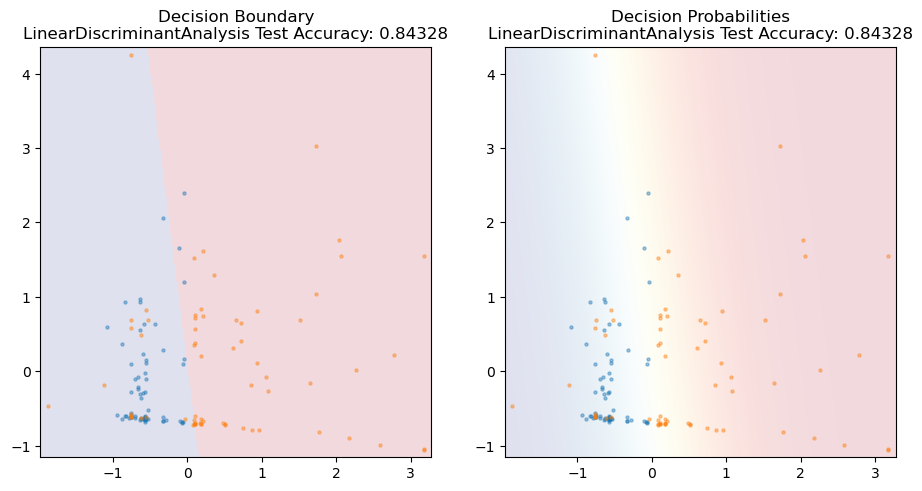

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m1=Ml_Model(X,y,True,balance=True,Oversampling=False)
clf=LinearDiscriminantAnalysis()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

## QDA

QuadraticDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.89      0.96      0.92        67

    accuracy                           0.92       134
   macro avg       0.92      0.92      0.92       134
weighted avg       0.92      0.92      0.92       134



Accuracy 

List of possible Accuracy Score:
 [0.9254, 0.9403, 0.9328, 0.9328, 0.9328, 0.9254, 0.9328, 0.9254, 0.9403, 0.9328, 0.9403, 0.9403, 0.9403, 0.9328, 0.9328, 0.9254, 0.9328, 0.9328]

Maximum Accuracy Score That can be obtained from this model is: 94.03 %

Minimum Accuracy Score: 92.54 %

Average Accuracy Score That can be obtained from this model is:: 0.933238888888889

Median Accuracy Score That can be obtained from this model is:: 0.9328

Standard Deviation is: 0.005253690648686776


Recall 

List of possible Recall Score:
 [0.9552, 0.9701, 0.9701, 0.9552, 0.9552, 0.9552, 0.9552, 0.9552, 0.9701, 0.9701, 0.9701, 0.9701, 0.

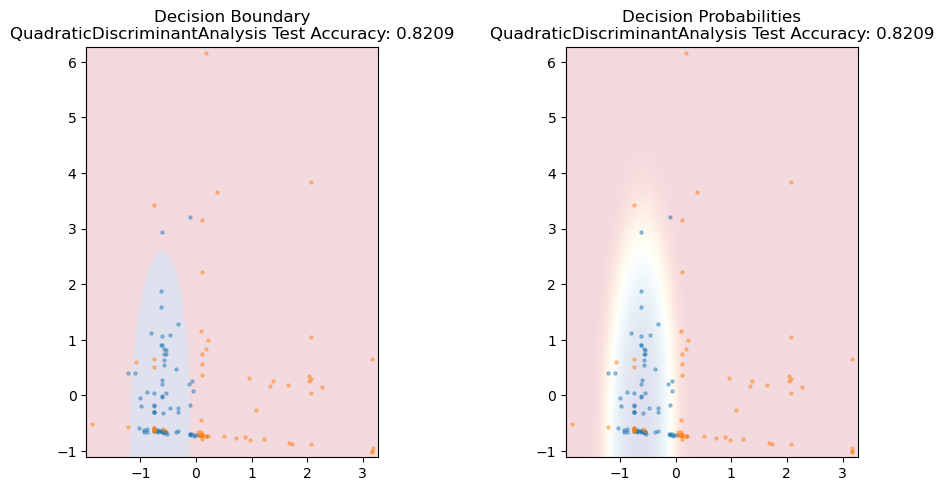

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m1=Ml_Model(X,y,balance=True)
clf=QuadraticDiscriminantAnalysis()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

## SVM

SVC(C=8)
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.95      0.93      0.94        67

    accuracy                           0.94       134
   macro avg       0.94      0.94      0.94       134
weighted avg       0.94      0.94      0.94       134



Accuracy 

List of possible Accuracy Score:
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Maximum Accuracy Score That can be obtained from this model is: 50.0 %

Minimum Accuracy Score: 50.0 %

Average Accuracy Score That can be obtained from this model is:: 0.5

Median Accuracy Score That can be obtained from this model is:: 0.5

Standard Deviation is: 0.0


Recall 

List of possible Recall Score:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Recall Score That can be obtained from this model is: 100.0 %

Minimum Recall Score: 100.0 %

Average Recall Sco

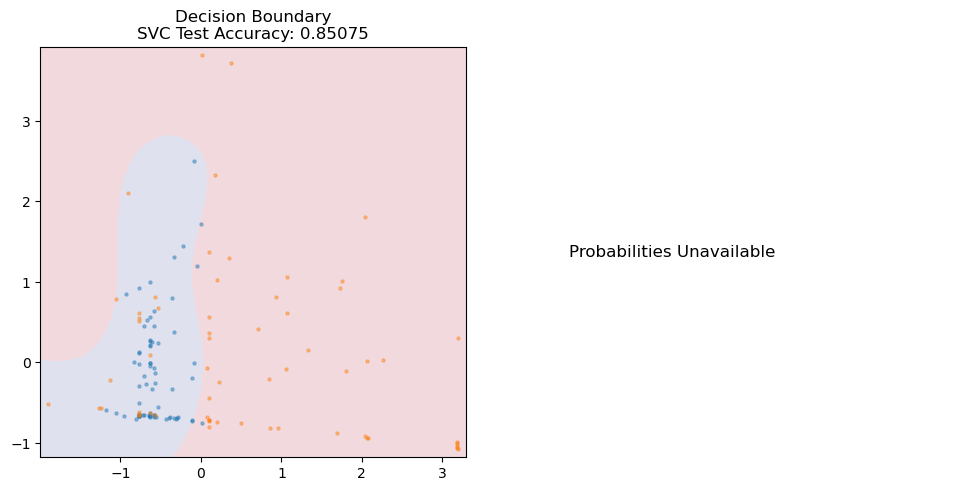

In [59]:
from sklearn.svm import SVC
m1=Ml_Model(X,y,scaling=True,balance=True)
clf=SVC(C=8)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()



<h2> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Logistics Regression</a> </h2>

LogisticRegression(C=1, max_iter=1000)
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.95      0.88      0.91        66

    accuracy                           0.92       134
   macro avg       0.92      0.92      0.92       134
weighted avg       0.92      0.92      0.92       134



Accuracy 

List of possible Accuracy Score:
 [0.597, 0.5149, 0.5224, 0.5672, 0.7463, 0.8284, 0.5672, 0.5373, 0.5672, 0.5373, 0.5896, 0.5821, 0.6493, 0.5672, 0.6194, 0.5672, 0.5448, 0.5597]

Maximum Accuracy Score That can be obtained from this model is: 82.84 %

Minimum Accuracy Score: 51.49 %

Average Accuracy Score That can be obtained from this model is:: 0.5924722222222223

Median Accuracy Score That can be obtained from this model is:: 0.5672

Standard Deviation is: 0.07708989561656468


Recall 

List of possible Recall Score:
 [0.1818, 0.0152, 0.0303, 0.1212, 0.4848, 0.6515, 0.1212, 0.0606, 0.1212, 0.0606, 0.1667, 0.15

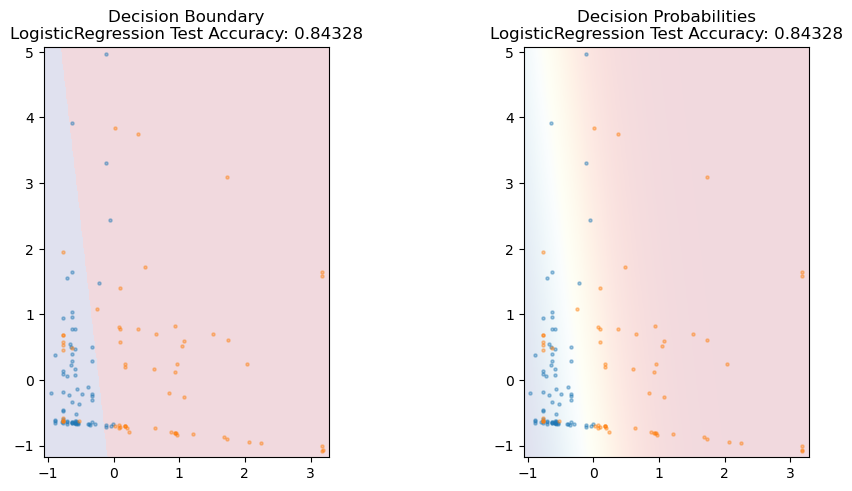

In [46]:
from sklearn.linear_model import LogisticRegression

m1=Ml_Model(X,y,scaling=True,balance=True)
clf=LogisticRegression(max_iter=1000,C=1)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

## MLP Classifier

MLPClassifier()
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.93      0.93      0.93        61

    accuracy                           0.94       134
   macro avg       0.94      0.94      0.94       134
weighted avg       0.94      0.94      0.94       134



Accuracy 

List of possible Accuracy Score:
 [0.8284, 0.7388, 0.8433, 0.8507, 0.7463, 0.806, 0.6194, 0.8731, 0.7164, 0.7761, 0.8582, 0.6716, 0.6269, 0.5448, 0.6194, 0.6716, 0.8358, 0.8433]

Maximum Accuracy Score That can be obtained from this model is: 87.31 %

Minimum Accuracy Score: 54.48 %

Average Accuracy Score That can be obtained from this model is:: 0.7483388888888889

Median Accuracy Score That can be obtained from this model is:: 0.7612

Standard Deviation is: 0.09905706626254995


Recall 

List of possible Recall Score:
 [0.623, 0.5246, 0.7049, 0.8033, 0.7049, 0.6721, 0.1803, 0.7213, 0.8033, 0.7377, 0.7213, 0.3443, 0.7541, 0.3607, 0.85

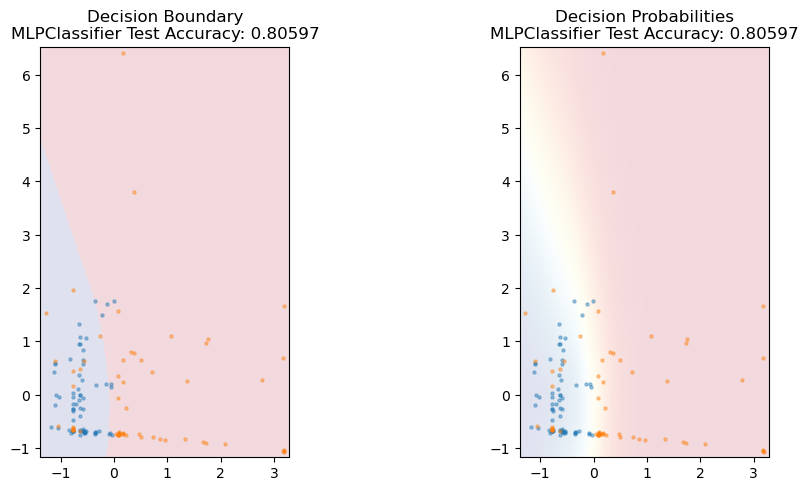

In [47]:
from sklearn.neural_network import MLPClassifier

m1=Ml_Model(X,y,scaling=True,balance=True)
clf=MLPClassifier()
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

<h2> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNN Algorithms</a> </h2>

KNeighborsClassifier(n_jobs=-1, p=1.5, weights='distance')
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        65
           1       0.88      0.84      0.86        69

    accuracy                           0.86       134
   macro avg       0.86      0.86      0.86       134
weighted avg       0.86      0.86      0.86       134



Accuracy 

List of possible Accuracy Score:
 [0.9925, 0.9925, 0.9925, 1.0, 0.9851, 0.9925, 0.9925, 0.9776, 1.0, 0.9925, 0.9925, 0.9851, 1.0, 1.0, 1.0, 1.0, 0.9851, 0.9776]

Maximum Accuracy Score That can be obtained from this model is: 100.0 %

Minimum Accuracy Score: 97.76 %

Average Accuracy Score That can be obtained from this model is:: 0.9921111111111112

Median Accuracy Score That can be obtained from this model is:: 0.9925

Standard Deviation is: 0.0072383154032235435


Recall 

List of possible Recall Score:
 [1.0, 0.9855, 0.9855, 1.0, 0.9855, 1.0, 0.9855, 0.9855, 1.0, 1.0, 0.9855, 0.9855, 1.0, 1

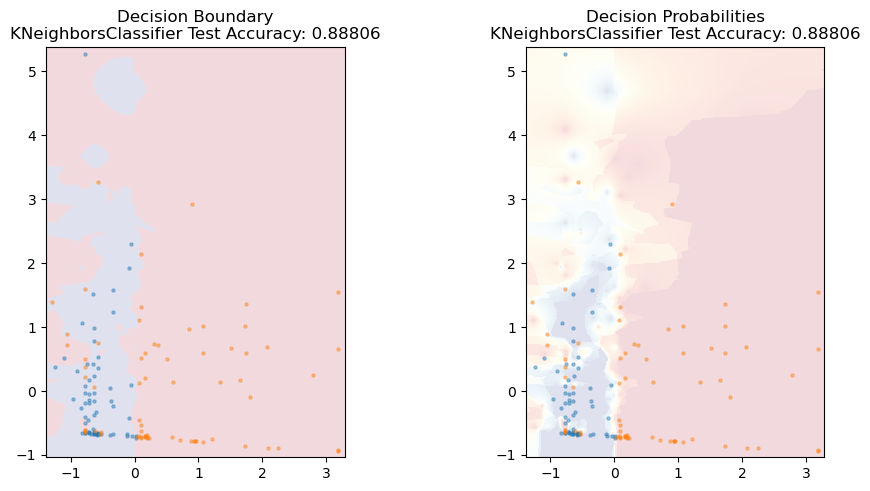

In [60]:
from sklearn.neighbors import KNeighborsClassifier
m1=Ml_Model(X,y,balance=True)
clf=KNeighborsClassifier(p=1.5,n_jobs=-1,n_neighbors=5,weights="distance") 
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

## Decision Tree 

DecisionTreeClassifier(max_depth=4, max_features=2, max_leaf_nodes=6)
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        68
           1       1.00      0.53      0.69        66

    accuracy                           0.77       134
   macro avg       0.84      0.77      0.75       134
weighted avg       0.84      0.77      0.75       134



Accuracy 

List of possible Accuracy Score:
 [0.9179, 0.9478, 0.9776, 0.709, 0.9328, 0.7388, 0.9179, 0.7313, 0.806, 0.8134, 0.9627, 0.9552, 0.7687, 0.7687, 0.9478, 0.7463, 0.7761, 0.7836]

Maximum Accuracy Score That can be obtained from this model is: 97.76 %

Minimum Accuracy Score: 70.89999999999999 %

Average Accuracy Score That can be obtained from this model is:: 0.8445333333333332

Median Accuracy Score That can be obtained from this model is:: 0.8097000000000001

Standard Deviation is: 0.09374120403180948


Recall 

List of possible Recall Score:
 [0.8485, 0.9091, 0.9545, 0.6061, 0.8939

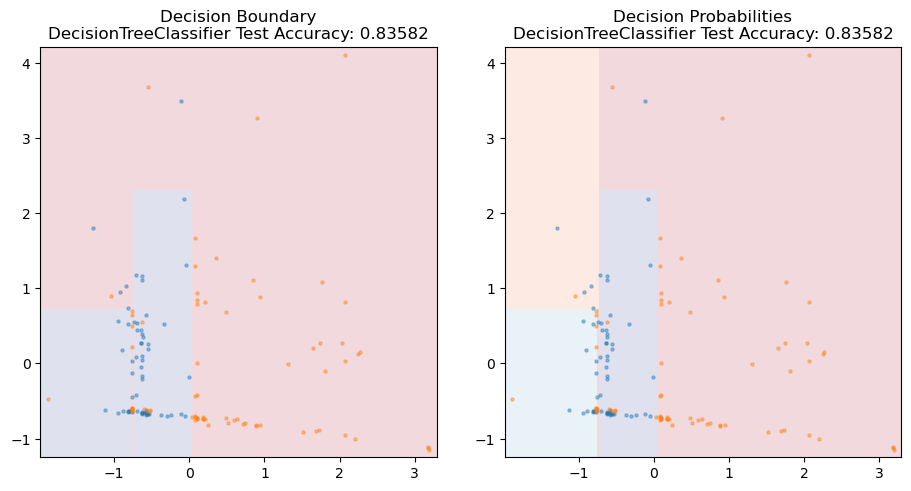

In [66]:
from sklearn.tree import DecisionTreeClassifier
m1=Ml_Model(X,y,balance=True)
clf=DecisionTreeClassifier(max_leaf_nodes=6,max_depth=4,max_features=2,)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()

## Random Forest

RandomForestClassifier(max_leaf_nodes=30, n_estimators=50)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.97      0.98        65

    accuracy                           0.99       192
   macro avg       0.99      0.98      0.99       192
weighted avg       0.99      0.99      0.99       192



Accuracy 

List of possible Accuracy Score:
 [0.9948, 1.0, 0.9948, 1.0, 1.0, 0.9948, 1.0, 1.0, 0.9948, 0.9948, 0.9948, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9948, 0.9948]

Maximum Accuracy Score That can be obtained from this model is: 100.0 %

Minimum Accuracy Score: 99.48 %

Average Accuracy Score That can be obtained from this model is:: 0.997688888888889

Median Accuracy Score That can be obtained from this model is:: 1.0

Standard Deviation is: 0.0025839007739997485


Recall 

List of possible Recall Score:
 [0.9846, 1.0, 0.9846, 1.0, 1.0, 0.9846, 1.0, 1.0, 0.9846, 0.9846, 0.9846, 1.0, 1.0, 1.0, 1.0, 1.0, 0.984

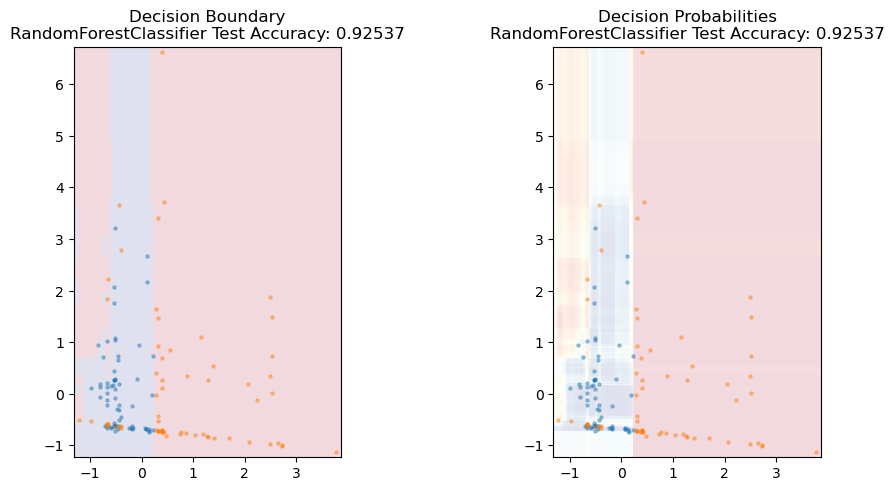

In [67]:

from sklearn.ensemble import RandomForestClassifier
m1=Ml_Model(X,y)
clf=RandomForestClassifier(n_estimators=50,max_leaf_nodes=30)
m1.pass_classifier(clf)
m1.fit_method_and_score()
m1.classification_report()
m1.validation()
m1.visualization()
